# Multi-scale SR in Tesser

Here is a notebook for playing around and comparing adjacency vs. transition matrices.
Function get_adj_tesser is based on the snippet in Athula's notebook.
Note that unlike state-action-state RL, here the agent doesn't take actions and is passively learning. Therefore, learning is more similar to Momennejad et al. 2017, Experiment 1, where the agent learns by viewing the world. 

In [8]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import os, sys
import os, sys
print(sys.version)
sys.path.append('../')
import networkx as nx
import graphviz

3.7.1 (v3.7.1:260ec2c36a, Oct 20 2018, 03:13:28) 
[Clang 6.0 (clang-600.0.57)]


# Get Adjacency Matrix & plot it

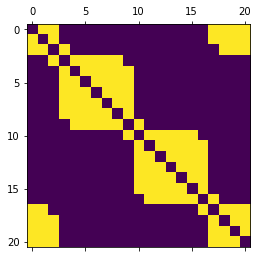

In [9]:
import get_adj_tesser as ga
A=ga.get_a() 
plt.matshow(A)
plt.show()

6


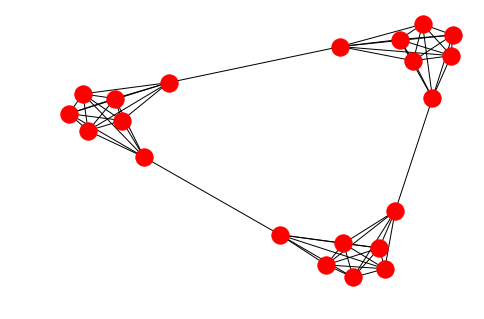

In [10]:
G=nx.from_numpy_matrix(A)
print(G.degree(2))
# use lines below for drawing if you have pygraphviz. it's tricky to install for some
#positions = nx.graphviz_layout(G, prog='twopi', root=0)
#nx.draw(G, pos)
nx.draw(G, pos=nx.spring_layout(G))

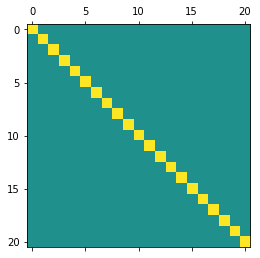

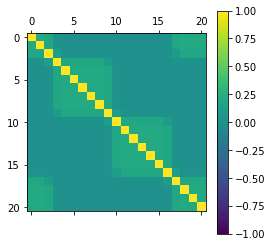

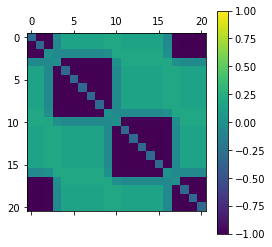

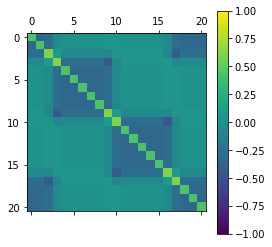

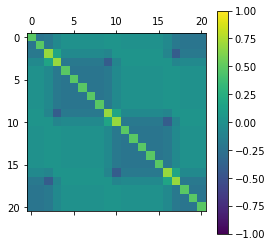

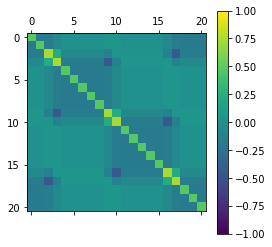

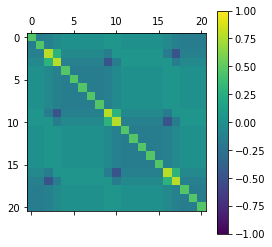

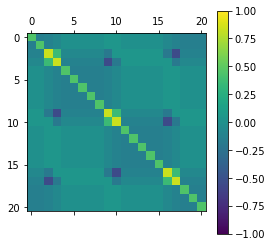

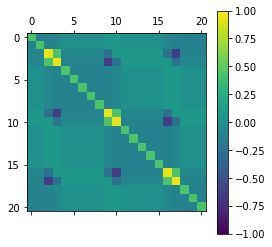

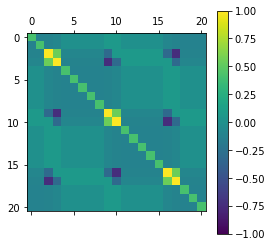

In [11]:
gamma_range=np.arange(1,10)/10
A_shape=np.shape(A)
#print(A_shape[1])
I=np.identity(A_shape[1])
plt.matshow(I, vmin=-1, vmax=1)
gamma_range
for g in gamma_range:
    sr_A = inv(I - (g * A))
    plt.matshow(sr_A, vmin=-1, vmax=1)
    plt.colorbar()

# Transition Matrix
Let's plot the transition and adjacency matrices side by side.
They're not very different here.

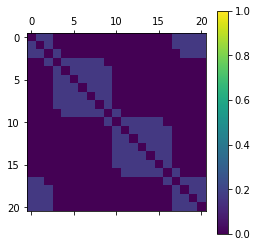

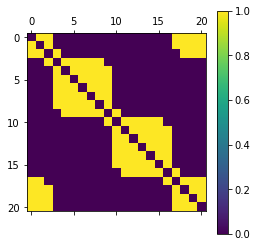

In [5]:
T=A/6
plt.matshow(T, vmin=0, vmax=1)
plt.colorbar()
plt.matshow(A, vmin=0, vmax=1)
plt.colorbar()

Now let us plot the SRs generated with the transition matrix.

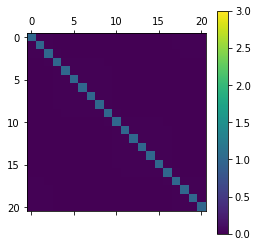

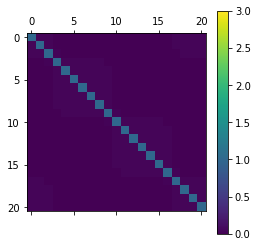

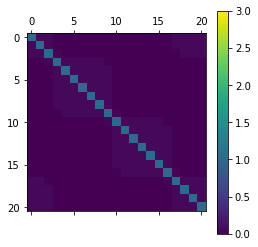

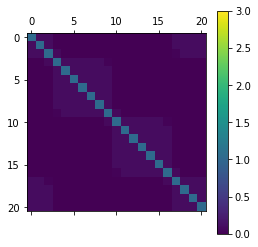

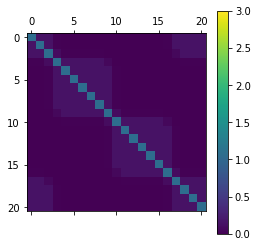

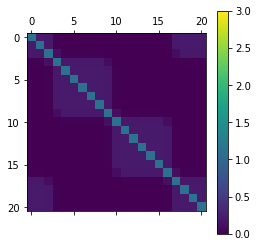

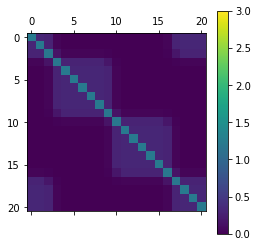

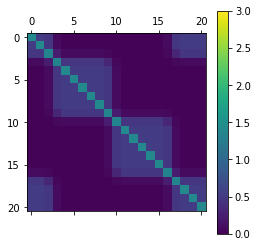

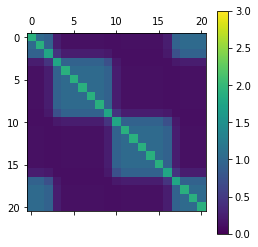

In [6]:
gamma_range=np.arange(1,10)/10

for g in gamma_range:
    sr_T = inv(I - (g * T))
    plt.matshow(sr_T, vmin=0, vmax=3)
    plt.colorbar()

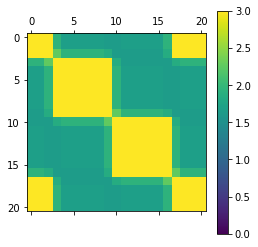

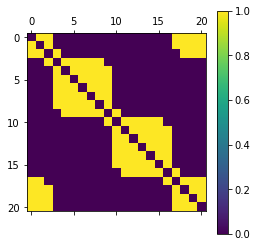

In [12]:
# What happens if we really increase the Gamma? 
sr_T = inv(I - (.98 * T))

plt.matshow(sr_T, vmin=0, vmax=3)
plt.colorbar()

# compare to adjacency
plt.matshow(A)
plt.colorbar()